# Light curve fit in sn_pipe

## Warning: you are encouraged to run the notebook for simulation before this one.

In [13]:
import yaml
from sn_fit.process_fit import Fitting
import h5py
from astropy.table import Table,vstack
import pprint
import glob

## Simulation available

In [14]:
ls Output_Simu

LC_prodid_1.hdf5  Simu_prodid_1.hdf5


## Fitter configuration file

In [15]:
# load a generic yaml file
configFile = '../input/fit_sn/param_fit_example.yaml'
config = yaml.load(open(configFile),Loader=yaml.FullLoader)

In [16]:
pprint.pprint(config)

{'Display': 0,
 'Fitter': {'model': 'salt2-extended',
            'name': 'sn_fitter.fit_sn_cosmo',
            'version': '1.0'},
 'Instrument': {'aerosol': 0,
                'airmass': 1.2,
                'atmos': 1,
                'atmosDir': 'THROUGHPUTS_DIR',
                'name': 'LSST',
                'throughputDir': 'LSST_THROUGHPUTS_BASELINE'},
 'LCSelection': {'naft': 10, 'nbef': 4, 'snrmin': 1.0},
 'Multiprocessing': {'nproc': 1},
 'Output': {'directory': 'Output_Fit', 'save': 1},
 'ProductionID': 'prodid',
 'Simulations': {'dirname': 'dbDir', 'prodid': 'prodid'},
 'WebPath': 'https://me.lsst.eu/gris/DESC_SN_pipeline',
 'mbcov': {'directory': 'SALT2_Files', 'estimate': 0}}


In [17]:
#modifying some of the parameters
config['Simulations']['dirname'] = 'Output_Simu'
config['Output']['directory'] = 'Output_Fit'
pprint.pprint(config)

{'Display': 0,
 'Fitter': {'model': 'salt2-extended',
            'name': 'sn_fitter.fit_sn_cosmo',
            'version': '1.0'},
 'Instrument': {'aerosol': 0,
                'airmass': 1.2,
                'atmos': 1,
                'atmosDir': 'THROUGHPUTS_DIR',
                'name': 'LSST',
                'throughputDir': 'LSST_THROUGHPUTS_BASELINE'},
 'LCSelection': {'naft': 10, 'nbef': 4, 'snrmin': 1.0},
 'Multiprocessing': {'nproc': 1},
 'Output': {'directory': 'Output_Fit', 'save': 1},
 'ProductionID': 'prodid',
 'Simulations': {'dirname': 'Output_Simu', 'prodid': 'prodid'},
 'WebPath': 'https://me.lsst.eu/gris/DESC_SN_pipeline',
 'mbcov': {'directory': 'SALT2_Files', 'estimate': 0}}


## Fitter instance

In [18]:
fit = Fitting(config)

## grab simulations

In [21]:
ls Output_Simu

LC_prodid_1.hdf5  Simu_prodid_1.hdf5


In [24]:
dirSimu = config['Simulations']['dirname']
prodidSimu = config['Simulations']['prodid']
simu_name = '{}/Simu_{}*.hdf5'.format(dirSimu, prodidSimu)
lc_name = '{}/LC_{}.hdf5'.format(dirSimu, prodidSimu)

simu_files = glob.glob(simu_name)

print(simu_files)
simu = Table()
for fi in simu_files:
     # getting the simu file
    f = h5py.File(fi, 'r')
    print(f.keys())
    # reading the simu file - load it in simu Table
    for i, key in enumerate(f.keys()):
        simu = vstack([simu, Table.read(fi, path=key)])

['Output_Simu/Simu_prodid_1.hdf5']
<KeysViewHDF5 ['summary_27238', 'summary_27239', 'summary_27244', 'summary_27246', 'summary_27247', 'summary_27248', 'summary_27250', 'summary_27251', 'summary_27257', 'summary_27259', 'summary_27260', 'summary_27262', 'summary_27333', 'summary_27344', 'summary_27345', 'summary_27346', 'summary_27347', 'summary_27348']>


In [25]:
simu

SNID,index_hdf5,season,fieldname,fieldid,n_lc_points,area,RA,Dec,sn_type,sn_model,sn_version,daymax,z,survey_area,healpixID,pixRA,pixDec,dL,ptime,snr_fluxsec_meth,status,ebvofMW,x0,epsilon_x0,x1,epsilon_x1,color,epsilon_color,epsilon_daymax
int64,bytes39,int64,bytes7,int64,int64,float64,float64,float64,bytes5,bytes14,bytes3,float64,float64,float64,int64,float64,float64,float64,float64,bytes6,int64,float64,float64,float64,float64,float64,float64,float64,float64
174,27238_0.01_59947.5183_1_174_-2.0_0.2_0,1,unknown,0,6,0.8392936452111668,149.90317926636075,1.6407295217938758,SN_Ia,salt2-extended,1.0,59947.51832280467,0.01,0.8392936452111668,27238,149.76562499999997,0.0,41959.39520882315,0.01956343650817871,interp,1,0.06691183894872665,0.01979313399461989,0.0,-2.0,0.0,0.2,0.0,0.0
175,27238_0.01_60304.5164_2_175_-2.0_0.2_0,2,unknown,0,3,0.8392936452111668,149.85487384084092,1.6498072544297169,SN_Ia,salt2-extended,1.0,60304.51639537523,0.01,0.8392936452111668,27238,149.76562499999997,0.0,41959.39520882315,0.020052671432495117,interp,1,0.06879208981990814,0.01979313399461989,0.0,-2.0,0.0,0.2,0.0,0.0
176,27238_0.01_60687.4868_3_176_-2.0_0.2_0,3,unknown,0,9,0.8392936452111668,150.08340900410053,1.6082726153123932,SN_Ia,salt2-extended,1.0,60687.48682919083,0.01,0.8392936452111668,27238,149.76562499999997,0.0,41959.39520882315,0.019611597061157227,interp,1,0.2685944437980652,0.01979313399461989,0.0,-2.0,0.0,0.2,0.0,0.0
177,27238_0.01_61052.4767_4_177_-2.0_0.2_0,4,unknown,0,12,0.8392936452111668,149.9611535286025,1.6437410643124204,SN_Ia,salt2-extended,1.0,61052.47666523937,0.01,0.8392936452111668,27238,149.76562499999997,0.0,41959.39520882315,0.01955246925354004,interp,1,0.06966947019100189,0.01979313399461989,0.0,-2.0,0.0,0.2,0.0,0.0
178,27238_0.01_61417.4934_5_178_-2.0_0.2_0,5,unknown,0,12,0.8392936452111668,150.0013008301194,1.6532129428138627,SN_Ia,salt2-extended,1.0,61417.49339330313,0.01,0.8392936452111668,27238,149.76562499999997,0.0,41959.39520882315,0.019582748413085938,interp,1,0.0751594826579094,0.01979313399461989,0.0,-2.0,0.0,0.2,0.0,0.0
179,27238_0.01_61776.4969_6_179_-2.0_0.2_0,6,unknown,0,15,0.8392936452111668,150.09532065361086,1.5850641840679274,SN_Ia,salt2-extended,1.0,61776.496948613785,0.01,0.8392936452111668,27238,149.76562499999997,0.0,41959.39520882315,0.0326237678527832,interp,1,0.2883613109588623,0.01979313399461989,0.0,-2.0,0.0,0.2,0.0,0.0
180,27238_0.01_62146.4959_7_180_-2.0_0.2_0,7,unknown,0,15,0.8392936452111668,150.01994090918345,1.6161773722742048,SN_Ia,salt2-extended,1.0,62146.49585377517,0.01,0.8392936452111668,27238,149.76562499999997,0.0,41959.39520882315,0.01965928077697754,interp,1,0.20833347737789154,0.01979313399461989,0.0,-2.0,0.0,0.2,0.0,0.0
181,27238_0.01_62526.4453_8_181_-2.0_0.2_0,8,unknown,0,3,0.8392936452111668,149.95887424251907,1.583958156873655,SN_Ia,salt2-extended,1.0,62526.445298785686,0.01,0.8392936452111668,27238,149.76562499999997,0.0,41959.39520882315,0.019379138946533203,interp,1,0.2703842520713806,0.01979313399461989,0.0,-2.0,0.0,0.2,0.0,0.0
182,27238_0.01_62874.4999_9_182_-2.0_0.2_0,9,unknown,0,12,0.8392936452111668,150.058866554396,1.625004532185293,SN_Ia,salt2-extended,1.0,62874.49992988615,0.01,0.8392936452111668,27238,149.76562499999997,0.0,41959.39520882315,0.019805431365966797,interp,1,0.22632668912410736,0.01979313399461989,0.0,-2.0,0.0,0.2,0.0,0.0


## Loop on LC simulation and fit

In [32]:
print('Number of LCs',len(simu))
fitres = Table()
for i,fi in enumerate(simu_files):
    valspl = fi.split('/')
    lc_name = valspl[-1].replace('Simu','LC')
    vv = valspl[:-1]+[lc_name]
    lc_name = '/'.join(vv)
    print(lc_name)
    
    f = h5py.File(fi, 'r')
    print(f.keys())
    # reading the simu file - load it in simu Table
    for i, key in enumerate(f.keys()):
        sim = Table.read(fi, path=key)
        for val in sim:
            lc = Table.read(lc_name, path='lc_{}'.format(val['index_hdf5']))
            lc.convert_bytestring_to_unicode()
            if val['status'] == 1:
                res = fit(lc)
                fitres = vstack([fitres, res])
    #if i>=20:
    #    break

Number of LCs 173
Output_Simu/LC_prodid_1.hdf5
<KeysViewHDF5 ['summary_27238', 'summary_27239', 'summary_27244', 'summary_27246', 'summary_27247', 'summary_27248', 'summary_27250', 'summary_27251', 'summary_27257', 'summary_27259', 'summary_27260', 'summary_27262', 'summary_27333', 'summary_27344', 'summary_27345', 'summary_27346', 'summary_27347', 'summary_27348']>


In [33]:
fitres

Dec,RA,color,dL,daymax,ebvofMW,epsilon_color,epsilon_daymax,epsilon_x0,epsilon_x1,healpixID,pixDec,pixRA,ptime,season,sn_model,sn_type,sn_version,snr_fluxsec_meth,status,survey_area,x0,x1,z,z_fit,Cov_t0t0,Cov_t0x0,Cov_t0x1,Cov_t0color,Cov_x0x0,Cov_x0x1,Cov_x0color,Cov_x1x1,Cov_x1color,Cov_colorcolor,t0_fit,x0_fit,x1_fit,color_fit,mbfit,fitstatus,phase_min,phase_max,N_bef,N_aft,N_bef_u,N_aft_u,SNR_u,N_bef_g,N_aft_g,SNR_g,N_bef_r,N_aft_r,SNR_r,N_bef_i,N_aft_i,SNR_i,N_bef_z,N_aft_z,SNR_z,N_bef_y,N_aft_y,SNR_y
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,str14,str5,str3,str6,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str5,float64,float64,int64,int64,int64,int64,int64,int64,int64,float64,int64,int64,float64,int64,int64,float64,int64,int64,int64,int64,int64,int64
1.6407295217938758,149.90317926636075,0.2,41959.39520882315,59947.51832280467,0.06691183894872665,0.0,0.0,0.0,0.0,27238,0.0,149.76562499999997,0.01956343650817871,1,salt2-extended,SN_Ia,1.0,interp,1,0.8392936452111668,0.01979313399461989,-2.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,nodat,59355.685199411026,59355.69130731343,0,3,0,0,0,0,1,3365.4149241809546,0,1,4906.566674354569,0,1,5025.55687295593,0,0,0,0,0,0
1.6498072544297169,149.85487384084092,0.2,41959.39520882315,60304.51639537523,0.06879208981990814,0.0,0.0,0.0,0.0,27238,0.0,149.76562499999997,0.020052671432495117,2,salt2-extended,SN_Ia,1.0,interp,1,0.8392936452111668,0.01979313399461989,-2.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,nodat,59733.92684399359,59733.932951896,0,3,0,0,0,0,1,1099.6888199751588,0,1,2821.6321003668863,0,1,3695.1042857715734,0,0,0,0,0,0
1.6082726153123932,150.08340900410053,0.2,41959.39520882315,60687.48682919083,0.2685944437980652,0.0,0.0,0.0,0.0,27238,0.0,149.76562499999997,0.019611597061157227,3,salt2-extended,SN_Ia,1.0,interp,1,0.8392936452111668,0.01979313399461989,-2.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,nodat,60093.35573731252,60106.17311346197,0,6,0,0,0,0,2,2341.311358038926,0,2,4474.847445807389,0,2,5125.875955291031,0,0,0,0,0,0
1.6437410643124204,149.9611535286025,0.2,41959.39520882315,61052.47666523937,0.06966947019100189,0.0,0.0,0.0,0.0,27238,0.0,149.76562499999997,0.01955246925354004,4,salt2-extended,SN_Ia,1.0,interp,1,0.8392936452111668,0.01979313399461989,-2.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,nodat,60432.943722762124,60444.87103568354,0,4,0,0,0,0,1,3399.376105737989,0,2,4996.540646572456,0,1,5315.630367712861,0,0,0,0,0,0
1.6532129428138627,150.0013008301194,0.2,41959.39520882315,61417.49339330313,0.0751594826579094,0.0,0.0,0.0,0.0,27238,0.0,149.76562499999997,0.019582748413085938,5,salt2-extended,SN_Ia,1.0,interp,1,0.8392936452111668,0.01979313399461989,-2.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,nodat,60806.231483739844,60824.01905650149,0,12,0,0,0,0,4,6222.479371954459,0,4,9319.160565201735,0,4,9744.366927239422,0,0,0,0,0,0
1.5850641840679274,150.09532065361086,0.2,41959.39520882315,61776.496948613785,0.2883613109588623,0.0,0.0,0.0,0.0,27238,0.0,149.76562499999997,0.0326237678527832,6,salt2-extended,SN_Ia,1.0,interp,1,0.8392936452111668,0.01979313399461989,-2.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,nodat,61182.45646256782,61209.11696476932,0,15,0,0,0,0,5,2173.6921974563675,0,5,5142.104902591688,0,5,6631.61652483268,0,0,0,0,0,0
1.6161773722742048,150.01994090918345,0.2,41959.39520882315,62146.49585377517,0.20833347737789154,0.0,0.0,0.0,0.0,27238,0.0,149.76562499999997,0.01965928077697754,7,salt2-extended,SN_Ia,1.0,interp,1,0.8392936452111668,0.01979313399461989,-2.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,nodat,61520.04308957774,61577.40431644726,0,15,0,0,0,0,5,1601.5

In [34]:
fit.dump(fitres,0) # saving data on disk

In [35]:
ls Output_Fit

Fit_prodid.hdf5


## Display fit results

### load file from fit

In [36]:
fit_name = '{}/Fit_{}.hdf5'.format(config['Output']['directory'],config['ProductionID'])
f = h5py.File(fit_name, 'r')
print(f.keys())
# reading the fit file - load it in fit table
fittab = Table()
for i, key in enumerate(f.keys()):
    fittab = vstack([fittab, Table.read(fit_name, path=key)])

<KeysViewHDF5 ['fit_lc_0']>


<IPython.core.display.Javascript object>


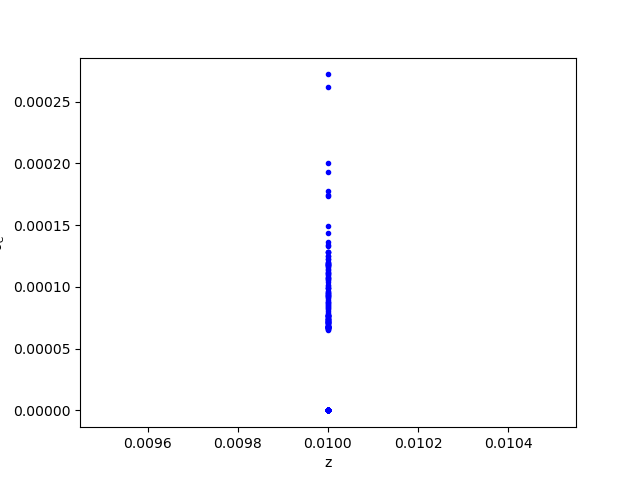

Text(0, 0.5, '$\\sigma_C$')

In [37]:
%matplotlib notebook
import matplotlib.pylab as plt
import numpy as np

# example: display error on the color vs z
fig, ax = plt.subplots()

ax.plot(fittab['z'],np.sqrt(fittab['Cov_colorcolor']),'b.')
ax.set_xlabel('z')
ax.set_ylabel('$\sigma_C$')